In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset=pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]].values

In [5]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

In [7]:
X,_ = make_blobs(n_samples=200, centers=5, random_state=42)


In [8]:
affinity_propagation = AffinityPropagation(affinity='euclidean',verbose=False) 
affinity_propagation = AffinityPropagation(preference=-50)  # Adjust preference to control clusters
affinity_propagation.fit(X)


AffinityPropagation(preference=-50)

In [9]:
cluster_centers = affinity_propagation.cluster_centers_
labels = affinity_propagation.labels_


In [10]:
# Step 5: Print number of clusters formed
n_clusters = len(np.unique(labels))
print(f"Number of clusters formed: {n_clusters}")


Number of clusters formed: 5


In [11]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_group']=affinity_propagation
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,AffinityPropagation(preference=-50)
1,2,Male,21,15,81,AffinityPropagation(preference=-50)
2,3,Female,20,16,6,AffinityPropagation(preference=-50)
3,4,Female,23,16,77,AffinityPropagation(preference=-50)
4,5,Female,31,17,40,AffinityPropagation(preference=-50)
...,...,...,...,...,...,...
195,196,Female,35,120,79,AffinityPropagation(preference=-50)
196,197,Female,45,126,28,AffinityPropagation(preference=-50)
197,198,Male,32,126,74,AffinityPropagation(preference=-50)
198,199,Male,32,137,18,AffinityPropagation(preference=-50)


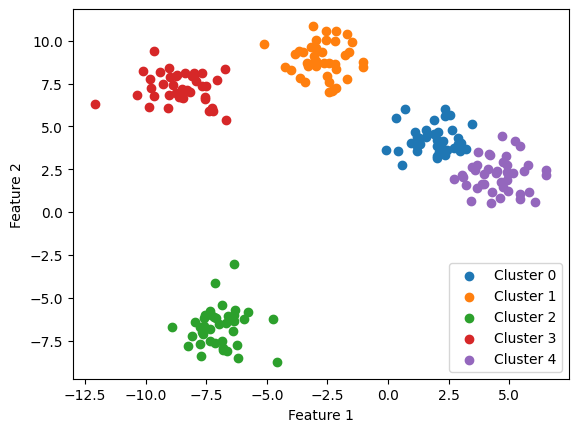

In [12]:
unique_labels = np.unique(labels)
for label in unique_labels:
    plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label}')
    plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


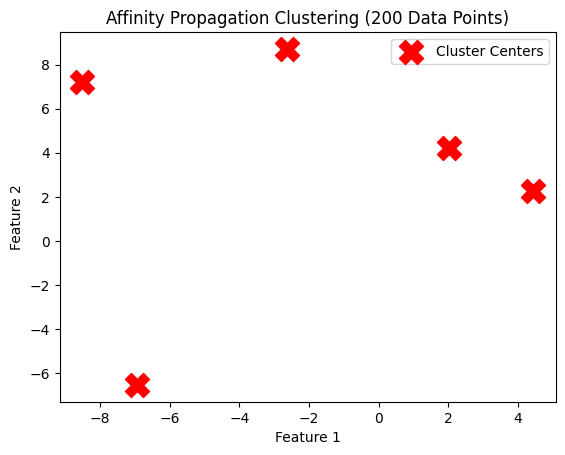

In [13]:
# Mark the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.title('Affinity Propagation Clustering (200 Data Points)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()